In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


## Read inputs

In [88]:
GHG =  pd.read_excel('/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/20220921_Data_Assumptions.xlsx', sheet_name='GHG Emissions', decimal=',')
GHG

,ID,Parameter,Ref,1990,1991,1992,1993,1994,1995,1996,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,GHG intensity of electrcity generation [g CO2e...,NaN,EEA 2022,652.0,656.0,628.0,631.0,626.0,610.0,580.0,...,62.59200,46.944000,31.296000,15.64800,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000
1,GHG intensity of electrcity generation [g CO2e...,NaN,Our world in Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.18012,3.135090,2.090060,1.04503,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000
2,Blue hydrogen emissions [g CO2/MJ H2] - Norway,NaN,Own calculation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.34300,32.479333,30.615667,28.75200,26.888333,25.024667,23.16100,21.297333,19.433667,17.5700
3,Blue hydrogen emissions [kg CO2/kg H2] - Norway,NaN,Own calculation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.12116,3.897520,3.673880,3.45024,3.226600,3.002960,2.77932,2.555680,2.332040,2.1084
4,Properties,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CH4 LHV [KWh/kg],13.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,H2 LHV [KWh/kg],33.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CH4 GWP20 [Years],86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,CH4 GWP100 [Years],30,"Bauer, https://www.ercevolution.energy/ipcc-si...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Combustion emissions CH4 [g CO2/MJ],56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Definition of variables


In [89]:
# LHV H2 in moles per MJ
LHV_H2_moles_MJ = float(GHG[GHG.ID == 'H2 LHV [mole/MJ]']['Parameter'].values)
LHV_H2_moles_MJ

4.128787878787879

In [90]:
# CO2 produced during SMR @ 1 mole CO2 per 4 moles H2 [moles CO2/MJ]
CO2_SMR_mole = LHV_H2_moles_MJ * 1/4
CO2_SMR_mole

1.0321969696969697

In [91]:
# Molecular weight of CO2 [g/Mole]
CO2_g_mole = float(GHG[GHG.ID == 'CO2 [g/Mole]']['Parameter'].values)
CO2_g_mole

44.01

In [92]:
# Capture rate syngas [%] low
capture_rate_low = float(GHG[GHG.ID == 'Capture rate [%] low']['Parameter'].values)
capture_rate_low

0.55

In [93]:
# Capture rate syngas [%] mid
capture_rate_mid = float(GHG[GHG.ID == 'Capture rate [%] mid']['Parameter'].values)
capture_rate_mid

0.8

In [94]:
# Capture rate syngas [%] high
capture_rate_high = float(GHG[GHG.ID == 'Capture rate [%] high']['Parameter'].values)
capture_rate_high

0.95

In [95]:
# Molecular weight of CH4 [g/Mole]
CH4_g_mole = float(GHG[GHG.ID == 'CH4 [g/Mole]']['Parameter'].values)
CH4_g_mole

16.04

In [96]:
# Heat consumption to drive SMR in [MJ/mole_H2]
Drive_Energy_MJ_mole_h2 = float(GHG[GHG.ID == 'Heat Input [MJ/mole_H2]']['Parameter'].values)
Drive_Energy_MJ_mole_h2

0.1814

In [97]:
# Emission intensity of CH4 [g CO2/MJ]
emission_intensity_CH4 = float(GHG[GHG.ID == 'Combustion emissions CH4 [g CO2/MJ]']['Parameter'].values)
emission_intensity_CH4

56.0

In [98]:
# Flue gas capture rate [%] low
capture_rate_flue_gas_low = float(GHG[GHG.ID == 'Capture rate [%] flue gas low']['Parameter'].values)
capture_rate_flue_gas_low

0.65

In [99]:
# Flue gas capture rate [%] high
capture_rate_flue_gas_high = float(GHG[GHG.ID == 'Capture rate [%] flue gas high']['Parameter'].values)
capture_rate_flue_gas_high

0.9

In [100]:
#GWP20 of methane
GWP20_CH4 = float(GHG[GHG.ID == 'CH4 GWP20 [Years]']['Parameter'].values)
GWP20_CH4

86.0

In [101]:
#GWP100 of methane
GWP100_CH4 = float(GHG[GHG.ID == 'CH4 GWP100 [Years]']['Parameter'].values)
GWP100_CH4

30.0

In [102]:
# Methane leakage rate in %
leakage_rate_low = float(GHG[GHG.ID == 'Upstream methane leakage rate [%] low']['Parameter'].values)
leakage_rate_low

0.002

In [103]:
# Methane leakage rate in %
leakage_rate_mid = float(GHG[GHG.ID == 'Upstream methane leakage rate [%] mid']['Parameter'].values)
leakage_rate_mid

0.015

In [104]:
# Methane leakage rate in %
leakage_rate_high = float(GHG[GHG.ID == 'Upstream methane leakage rate [%] high']['Parameter'].values)
leakage_rate_high

0.08

# Direct emissions from SMR

In [105]:
# CO2 emissions from SMR process [g CO2/MJ]
Direct_emissions_grey = CO2_g_mole * CO2_SMR_mole
Direct_emissions_grey

45.42698863636364

In [106]:
# CO2 emissions from SMR @ 55% capture rate [g CO2/MJ]
Direct_emissions_low = Direct_emissions_grey * (1-capture_rate_low)
Direct_emissions_low

20.442144886363636

In [107]:
# CO2 emissions from SMR @ 55% capture rate [g CO2/MJ]
Direct_emissions_mid = Direct_emissions_grey * (1-capture_rate_mid)
Direct_emissions_mid

9.085397727272726

In [108]:
# CO2 emissions from SMR @ 55% capture rate [g CO2/MJ]
Direct_emissions_high = Direct_emissions_grey * (1-capture_rate_high)
Direct_emissions_high

2.271349431818184

In [109]:
#CH4 consumed during SMR @ 1 mole CH4 per 4 moles H2 [g CH4/MJ]
CH4_SMR_grams = 1.03 * CH4_g_mole
CH4_SMR_grams


16.5212

# Drive emissions SMR
Emissions from energy to drive SMR

## w/o flue gas capture (Grey)

In [110]:
# When burning natural gas for heat production CO2 is emitted [CO2/mole_H2]
Drive_CO2_emissions_mole = Drive_Energy_MJ_mole_h2 * emission_intensity_CH4
Drive_CO2_emissions_mole

10.1584

In [111]:
# CO2 emissions per MJ hydrogen in order to create heat and pressure - w/o flue gas capture [g CO2/MJ_H2]
Drive_CO2_emissions_grams_grey = Drive_CO2_emissions_mole * LHV_H2_moles_MJ
Drive_CO2_emissions_grams_grey

41.94187878787879

## w/o flue gas capture (blue)

In [112]:
# CO2 emissions drive with flue gas capture - low [g CO2/MJ]
Drive_CO2_emissions_grams_blue_flue_low = Drive_CO2_emissions_grams_grey * (1 - capture_rate_flue_gas_low)
Drive_CO2_emissions_grams_blue_flue_low

14.679657575757576

In [113]:
# CO2 emissions drive with flue gas capture - high [g CO2/MJ]
Drive_CO2_emissions_grams_blue_flue_high = Drive_CO2_emissions_grams_grey * (1 - capture_rate_flue_gas_high)
Drive_CO2_emissions_grams_blue_flue_high

4.194187878787878

# Check this cell!!

In [118]:
# CH4 consumed to drive the process [g CH4/MJ_H2]
Drive_CH4_consumed = Drive_Energy_MJ_mole_h2 * 1/CO2_g_mole * CH4_g_mole
Drive_CH4_consumed

0.06611351965462395

# Total direct CO2 emissions

## Without flue gas capture

In [120]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_grey = Direct_emissions_grey + Drive_CO2_emissions_grams_grey
Total_CO2_emissions_grey

87.36886742424244

In [121]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_low_no_fluegas = Direct_emissions_low + Drive_CO2_emissions_grams_grey
Total_CO2_emissions_blue_low_no_fluegas

62.38402367424243

In [122]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_mid_no_fluegas = Direct_emissions_mid + Drive_CO2_emissions_grams_grey
Total_CO2_emissions_blue_mid_no_fluegas

51.02727651515152

In [123]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_high_no_fluegas = Direct_emissions_high + Drive_CO2_emissions_grams_grey
Total_CO2_emissions_blue_high_no_fluegas

44.21322821969698

## With flue gas capture

### low (65%)

In [124]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_low_with_fluegas_low = Direct_emissions_low + Drive_CO2_emissions_grams_blue_flue_low
Total_CO2_emissions_blue_low_with_fluegas_low

35.12180246212121

In [125]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_mid_with_fluegas_low = Direct_emissions_mid + Drive_CO2_emissions_grams_blue_flue_low
Total_CO2_emissions_blue_mid_with_fluegas_low

23.7650553030303

In [126]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_high_with_fluegas_low = Direct_emissions_high + Drive_CO2_emissions_grams_blue_flue_low
Total_CO2_emissions_blue_high_with_fluegas_low

16.95100700757576

### high (90%)

In [127]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_low_with_fluegas_high = Direct_emissions_low + Drive_CO2_emissions_grams_blue_flue_high
Total_CO2_emissions_blue_low_with_fluegas_high

24.636332765151515

In [128]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_mid_with_fluegas_high = Direct_emissions_mid + Drive_CO2_emissions_grams_blue_flue_high
Total_CO2_emissions_blue_mid_with_fluegas_high

13.279585606060603

In [129]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_high_with_fluegas_high = Direct_emissions_high + Drive_CO2_emissions_grams_blue_flue_high
Total_CO2_emissions_blue_high_with_fluegas_high

6.465537310606063

## Indirect emissions from natural gas transport and storage

In [130]:
# Indirect emissions from natural gas transport and storage [g CO2/MJ_H2]
Indirect_emissions = Total_CO2_emissions_grey * 0.075
Indirect_emissions

6.552665056818182

93.92153248106062

# CH4 upstream emissions

In [133]:
# CH4 consumption as feedstock and energy to drive SMR [g CH4/MJ_H2]
Total_methane_SMR = CH4_SMR_grams + Drive_CH4_consumed
Total_methane_SMR

16.587313519654625

In [134]:
# Quantity of methane consumed to produce grey hydrogen [g CH4/MJ_H2]
upstream_emissions_CH4_low = leakage_rate_low * Total_methane_SMR
upstream_emissions_CH4_low

0.03317462703930925

In [135]:
# Quantity of methane consumed to produce grey hydrogen [g CH4/MJ_H2]
upstream_emissions_CH4_mid = leakage_rate_mid * Total_methane_SMR
upstream_emissions_CH4_mid

0.24880970279481937

In [136]:
# Quantity of methane consumed to produce grey hydrogen [g CH4/MJ_H2]
upstream_emissions_CH4_high = leakage_rate_high * Total_methane_SMR
upstream_emissions_CH4_high

1.32698508157237

In [137]:
# Upstream emissions at GWP20 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP20_low = upstream_emissions_CH4_low * GWP20_CH4
upstream_emissions_GWP20_low


2.853017925380595

In [138]:
# Upstream emissions at GWP20 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP20_mid = upstream_emissions_CH4_mid * GWP20_CH4
upstream_emissions_GWP20_mid

21.397634440354466

In [139]:
# Upstream emissions at GWP20 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP20_high = upstream_emissions_CH4_high * GWP20_CH4
upstream_emissions_GWP20_high

114.12071701522382

In [140]:
# Upstream emissions at GWP100 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP100_low = upstream_emissions_CH4_low * GWP100_CH4
upstream_emissions_GWP100_low

0.9952388111792775

In [141]:
# Upstream emissions at GWP100 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP100_mid = upstream_emissions_CH4_mid * GWP100_CH4
upstream_emissions_GWP100_mid

7.464291083844581

In [142]:
# Upstream emissions at GWP100 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP100_high = upstream_emissions_CH4_high * GWP100_CH4
upstream_emissions_GWP100_high

39.8095524471711

# Total emissions

In [143]:
# Total CO2 emissions including indirect emissions from natural gas transport and storage
Total_CO2_emissions = Total_CO2_emissions_grey + Indirect_emissions
Total_CO2_emissions

93.92153248106062

## w/o flue gas capture

### @ GWP20

In [144]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP20_low = Total_CO2_emissions_grey + Indirect_emissions + upstream_emissions_GWP20_low
Total_emissions_grey_GWP20_low

96.77455040644122

In [145]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP20_mid = Total_CO2_emissions_grey + Indirect_emissions + upstream_emissions_GWP20_mid
Total_emissions_grey_GWP20_mid


115.31916692141509

In [146]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP20_high = Total_CO2_emissions_grey + Indirect_emissions + upstream_emissions_GWP20_high
Total_emissions_grey_GWP20_high

208.04224949628446

### @ GWP100

In [147]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP100_low = Total_CO2_emissions + upstream_emissions_GWP100_low
Total_emissions_grey_GWP100_low

94.9167712922399

In [148]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP100_mid = Total_CO2_emissions + upstream_emissions_GWP100_mid
Total_emissions_grey_GWP100_mid

101.38582356490521

In [149]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP100_high = Total_CO2_emissions + upstream_emissions_GWP100_high
Total_emissions_grey_GWP100_high

133.73108492823172

## w/ flue gas capture

### @GWP20

In [150]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP20_low = Total_CO2_emissions + upstream_emissions_GWP20_low
Total_emissions_grey_GWP20_low

96.77455040644122

In [151]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP20_mid = Total_CO2_emissions + upstream_emissions_GWP20_mid
Total_emissions_grey_GWP20_mid

115.31916692141509

In [152]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP20_high = Total_CO2_emissions + upstream_emissions_GWP20_high
Total_emissions_grey_GWP20_high

208.04224949628446

# Energy to power carbon capture

In [153]:
xx none according to Bauer et al.


SyntaxError: invalid syntax (591946292.py, line 1)

flue gas capture (FGC)

In [154]:
x =['Grey, 0.2%, GWP100\nw/o FGC', 'Grey, 0.2%, GWP20\nw/o FGC', 'Blue, 0.2%, GWP100\nCCS-low 55%, w/o FGC', 'Blue, 0.2%, GWP20\nCCS-low 55%, w/o FGC','Blue, 0.2%, GWP100\nCCS-mid 80%, FGC 65%', 'Blue, 0.2%, GWP20\nCCS-mid 80%, FGC 65%','Blue, 0.2%, GWP100\nCCS-high 95%, FGC 90%','Blue, 0.2%, GWP20\nCCS-high 95%, FGC 90%']

In [155]:
Direct_emissions = [Direct_emissions_grey, Direct_emissions_grey, Direct_emissions_low, Direct_emissions_low, Direct_emissions_mid, Direct_emissions_mid, Direct_emissions_high, Direct_emissions_high]

Drive_emissions_plt = [Drive_CO2_emissions_grams_grey, Drive_CO2_emissions_grams_grey, Drive_CO2_emissions_grams_grey, Drive_CO2_emissions_grams_grey, Drive_CO2_emissions_grams_blue_flue_low, Drive_CO2_emissions_grams_blue_flue_low, Drive_CO2_emissions_grams_blue_flue_high, Drive_CO2_emissions_grams_blue_flue_high]

Indirect_emissions_plt = [Indirect_emissions] * 8

Upstream_emissions = [upstream_emissions_GWP100_low, upstream_emissions_GWP20_low, upstream_emissions_GWP100_low, upstream_emissions_GWP20_low, upstream_emissions_GWP100_low, upstream_emissions_GWP20_low, upstream_emissions_GWP100_low, upstream_emissions_GWP20_low]

# Calc. total emissions for each case

In [156]:
Grey_GWP100 = Direct_emissions_grey + Drive_CO2_emissions_grams_grey + Indirect_emissions + upstream_emissions_GWP100_low
Grey_GWP100

94.9167712922399

In [157]:
Grey_GWP20 = Direct_emissions_grey + Drive_CO2_emissions_grams_grey + Indirect_emissions + upstream_emissions_GWP20_low
Grey_GWP20

96.77455040644122

In [ ]:
pess = Direct_emissions_low + Drive_CO2_emissions_grams_grey + Indirect_emissions + upstream_emissions_GWP20_low
pess

In [153]:
opt = Direct_emissions_high + Drive_CO2_emissions_grams_blue_flue_high + Indirect_emissions + upstream_emissions_GWP20_low
opt

17.568851195456443

# Plot production emissions

In [149]:
x =['Grey, 0.2%, GWP100\nw/o FGC', 'Grey, 0.2%, GWP20\nw/o FGC', 'Blue, 0.2%, GWP100\nCCS-low 55%, w/o FGC', 'Blue, 0.2%, GWP20\nCCS-low 55%, w/o FGC','Blue, 0.2%, GWP100\nCCS-mid 80%, FGC 65%', 'Blue, 0.2%, GWP20\nCCS-mid 80%, FGC 65%','Blue, 0.2%, GWP100\nCCS-high 95%, FGC 90%','Blue, 0.2%, GWP20\nCCS-high 95%, FGC 90%']

Text(0, 0.5, 'g CO2eq/MJ H2')

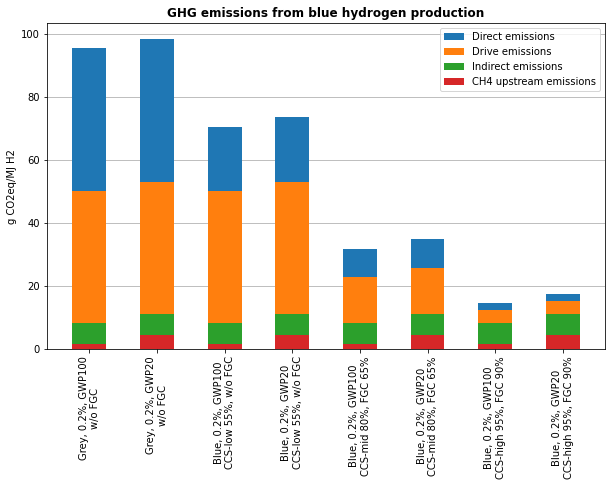

In [150]:
# Creating a stacked bar chart to display emissions. Adding lists for the bottom method.
fig, ax = plt.subplots(figsize=(10,6))

width = 0.5
#y_axis = np.arange(101,step=10)
direct = plt.bar(x, Direct_emissions, width, label='Direct emissions', bottom=list(map(lambda x, y, z: x + y + z, Upstream_emissions, Indirect_emissions_plt, Drive_emissions_plt)))
drive = plt.bar(x, Drive_emissions_plt, width, label='Drive emissions', bottom=list(map(lambda x, y: x + y, Upstream_emissions, Indirect_emissions_plt)))
indirect = plt.bar(x, Indirect_emissions, width, label = 'Indirect emissions', bottom=Upstream_emissions)
upstream = plt.bar(x, Upstream_emissions, width, label = 'CH4 upstream emissions')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
#ax.twinx()
plt.xticks(rotation = 90)
#plt.yticks(y_axis)
#plt.ylim(0,90)
plt.legend(loc='upper right')
plt.title('GHG emissions from blue hydrogen production', fontweight = 'bold')
plt.ylabel('g CO2eq/MJ H2')
#ax.set_ylabel('kg CO2/kg H2')

NameError: name 'Drive_emissions' is not defined

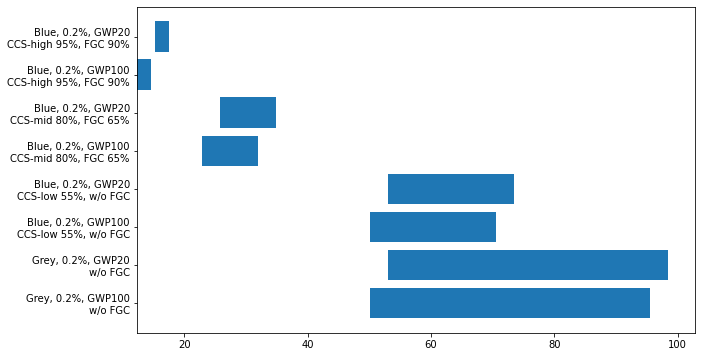

In [136]:
# horizontal
fig, ax = plt.subplots(figsize=(10,6))
x_axis = np.arange(101,step=10)
direct = plt.barh(x, Direct_emissions, label='Direct emissions grey', left=list(map(lambda x, y, z: x + y + z, Upstream_emissions, Indirect_emissions_plt, Drive_emissions_plt)))
drive = plt.barh(x, Drive_emissions, label='Drive emissions', left=list(map(lambda x, y: x + y, Upstream_emissions, Indirect_emissions_plt)))
indirect = plt.barh(x, Indirect_emissions, label = 'Indirect emissions', left=Upstream_emissions)
upstream = plt.barh(x, Upstream_emissions, label = 'CH4 upstream emissions')
plt.grid(True, axis = 'x')
ax.set_axisbelow(True)
plt.xticks(x_axis)
plt.xlim(0,100)
plt.legend(loc='upper right')
plt.title('GHG emissions from blue hydrogen production', fontweight = 'bold')
plt.xlabel('g CO2eq/MJ H2')

Text(0, 0.5, '[g CO2eq/MJ_H2]')

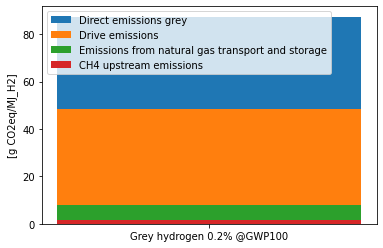

In [80]:
grey_low_GWP100 = 'Grey hydrogen 0.2% @GWP100'
plt.bar(grey_low_GWP100, Direct_emissions_grey, width= 2, label='Direct emissions grey', bottom=Drive_CO2_emissions_grams_grey)
plt.bar(grey_low_GWP100, Drive_CO2_emissions_grams_grey, width= 2, label='Drive emissions', bottom=Indirect_emissions)
plt.bar(grey_low_GWP100, Indirect_emissions, width= 2, label = 'Emissions from natural gas transport and storage', bottom=upstream_emissions_GWP100_low)
plt.bar(grey_low_GWP100, upstream_emissions_GWP100_low, width = 2, label = 'CH4 upstream emissions')
plt.legend(loc='upper left')
plt.ylabel('[g CO2eq/MJ_H2]')

Text(0, 0.5, '[g CO2eq/MJ_H2]')

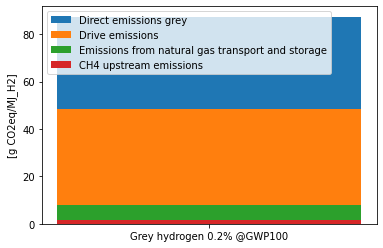

In [81]:
# Total emissions for grey hydrogen production at 0.02% upstream emissions and GWP100
grey_low_GWP100 = 'Grey hydrogen 0.2% @GWP100'
plt.bar(grey_low_GWP100, Direct_emissions_grey, width= 2, label='Direct emissions grey', bottom=Drive_CO2_emissions_grams_grey)
plt.bar(grey_low_GWP100, Drive_CO2_emissions_grams_grey, width= 2, label='Drive emissions', bottom=Indirect_emissions)
plt.bar(grey_low_GWP100, Indirect_emissions, width= 2, label = 'Emissions from natural gas transport and storage', bottom=upstream_emissions_GWP100_low)
plt.bar(grey_low_GWP100, upstream_emissions_GWP100_low, width = 2, label = 'CH4 upstream emissions')
plt.legend(loc='upper left')
plt.ylabel('[g CO2eq/MJ_H2]')

Text(0, 0.5, '[g CO2eq/MJ_H2]')

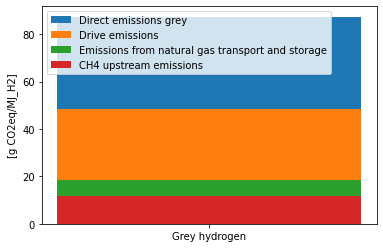

In [82]:
# Total emissions for grey hydrogen production at 1.5% upstream emissions and GWP100
grey = 'Grey hydrogen'
plt.bar(grey, Direct_emissions_grey, width= 2, label='Direct emissions grey', bottom=Drive_CO2_emissions_grams_grey)
plt.bar(grey, Drive_CO2_emissions_grams_grey, width= 2, label='Drive emissions', bottom=Indirect_emissions)
plt.bar(grey, Indirect_emissions, width= 2, label = 'Emissions from natural gas transport and storage', bottom=upstream_emissions_GWP100_mid)
plt.bar(grey, upstream_emissions_GWP100_mid, width = 2, label = 'CH4 upstream emissions')
plt.legend(loc='upper left')
plt.ylabel('[g CO2eq/MJ_H2]')


In [ ]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig
plot_colortable(mcolors.CSS4_COLORS)
plt.show()
